# Samuels Viewer

Interface to functionality for viewing and comparing corpora processed with the Samuels Processor

In [1]:
import SamuelsCorpus as Sam
%matplotlib inline

Set up some filenames - these should be the base names (Samuels Viewer will add the _combined.csv and _cooccurrence.json endings for the individual files.  Only set the parentdir if these files are not stored in the current directory.)

In [2]:
#parentdir="/Users/juliewe/Dropbox/oldbailey/speech_corpora/theft/all/samuels_tagged"
filenames={'fnonl':'f_nonl','mnonl':'m_nonl'}
           

Load up files into a Samuels Viewer

In [3]:
fnonl=Sam.Viewer(filenames['fnonl'],colors=['r'])

Now we can play with the bag-of-words functionality in the SamuelsViewer

Size of corpus is 219407
(ZC [Grammatical Item],52409) : [('the', 13843), ('and', 5886), ('a', 4064), ('in', 3748), ('of', 3743), ('to', 3721), ('on', 1677), ('at', 1536), ('with', 1233), ('had', 1166)]
(NULL,29902) : [(',', 13389), ('.', 9084), (';', 6341), ('-', 390), (':', 264), ('"', 78), (')', 75), ('(', 74), ('?', 50), ('!', 29)]
(ZF [Pronoun],28680) : [('i', 11051), ('he', 3310), ('it', 2704), ('she', 2520), ('me', 2151), ('him', 1636), ('her', 1332), ('them', 1040), ('they', 695), ('that', 493)]
(AK.01.g [State/condition],7719) : [('was', 3778), ('is', 1089), ('am', 987), ('were', 763), ('been', 351), ('be', 275), ('are', 238), ("'s", 107), ('being', 67), ('way', 53)]
(AP.04 [Number],5194) : [('two', 653), ('one', 446), ('three', 397), ('four', 260), ('five', 256), ('ten', 219), ('last', 212), ('next', 211), ('six', 199), ('eight', 170)]
(AW.01 [Owning],4737) : [('my', 2898), ('her', 712), ('his', 704), ('our', 143), ('own', 119), ('belonged', 38), ('their', 30), ('landlord', 2

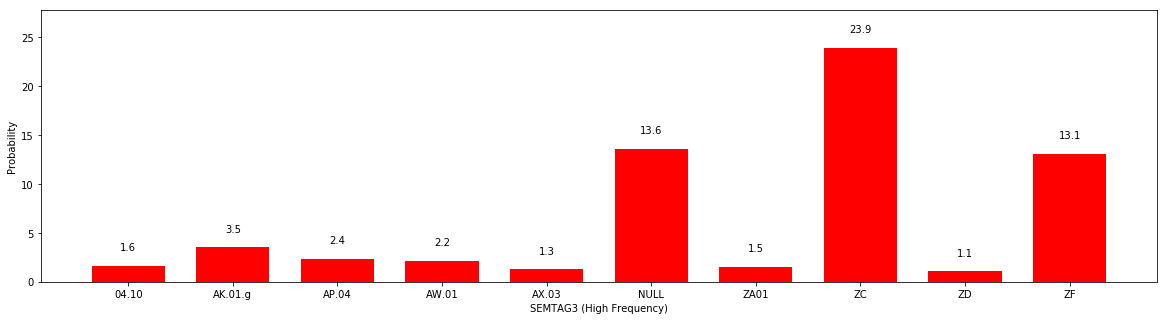

In [4]:
fnonl_tagbag=fnonl.make_bow(field='SEMTAG3',cutoff=10,displaygraph=True)

There are functions to find tags for words and words for tags e.g.,

In [5]:
fnonl.find_tags('woman',field='SEMTAG3')

[('AD.03.b [Woman]', 287),
 ('AY.06.b [The common people]', 3),
 ('AY.01.g.01 [Married woman]', 3),
 ('BB.09.b.01 [Servant]', 1)]

In [6]:
fnonl.find_text('AY.06.b')

[('woman', 3), ('people', 3), ('private', 1)]

We can also view the co-occurrence distributions for tags.  

* Note that the number associated with the tag is a weight.  Currently it is set to be normalised localised PPMI.  Localised PPMI multiplies PPMI by probability.  Normalisation means that the vector is a unit vector (this won't change the order of saliency but typically makes all of the numbers smaller since the unit vector has length 1 ... the reason for doing this is that it is then more efficient to compute similarities between vectors).

* Also note that the list of words (and associated "frequencies") are words which are typical of the semantic tag - they are not necessarult ones which are used in this context, and the sum of the frequencies is therefore typically more than the frequency of the semantic tag we are considering.  Making this list context specific is on the todo list ....

(_det:ZC [Grammatical Item],0.5206570208763489) : [('the', 596), ('a', 289), ('and', 285), ('to', 193), ('in', 170), ('of', 164), ('with', 89), ('for', 79), ('at', 67), ('on', 62)]
(attr:AK.01.g [State/condition],0.16886769000133567) : [('am', 43), ('was', 21), ('is', 17), ('were', 1), ('been', 1), ('be', 1), ('are', 1)]
(_amod:AF.05 [Plants defined by age/cycles],0.1511265479930568) : [('young', 29), ('younger', 1)]
(_det:ZZ [Unrecognised],0.12641793226518835) : [('another', 27), ('coming', 10), ('ago', 3), ('used', 2), ('why', 1), ('tongs', 1), ('last', 1), ('going', 1), ('for', 1), ('before', 1)]
(_amod:AP.02.b [Individual character/quality],0.09951310713010662) : [('single', 19), ('several', 2)]
(_amod:AW.04 [Poverty],0.07652088076714036) : [('poor', 13)]
(_compound:BF.23.f.02 [Lay functionaries],0.04094563977501498) : [('widow', 7)]
(dobj:AI.14.b [Seeing/looking],0.03462305240501497) : [('saw', 20), ('see', 1), ('looked', 1), ('at', 1)]
(ROOT:AD.03.b [Woman],0.034121366479179155) 

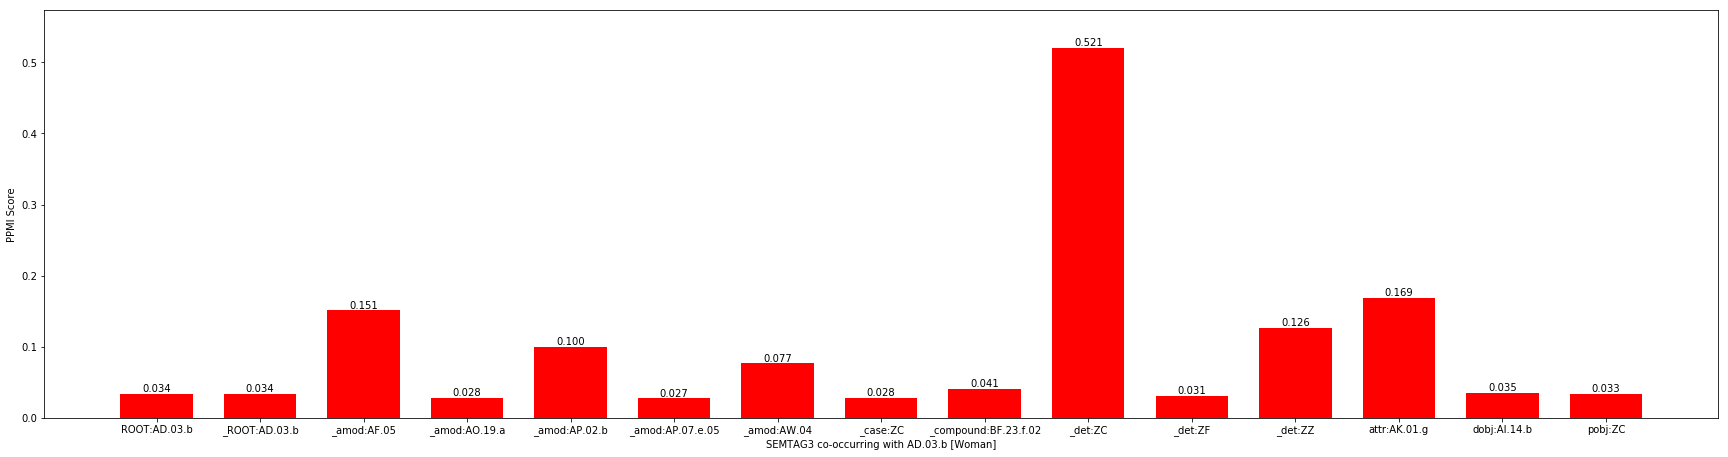

In [7]:
woman=fnonl.get_top_features('AD.03.b',displaygraph=True,cutoff=15)

(_det, 0.8413218339649193)
(_amod, 0.46157737190559717)
(attr, 0.22871940235902447)
(nsubj, 0.10909718358435545)
(_relcl, 0.09641608758415425)
(pobj, 0.04208351666946858)
(dobj, 0.04084590301387784)
(_case, 0.040449404538828)
(_nummod, 0.01767094494386553)
(_compound, 0.01205857671937562)
(poss, 0.004651447808647764)
(_appos, 0.00442511730576303)
(_predet, 0.004388378277456284)
(_acl, 0.004356004258394806)
(parataxis, 0.000518639224088199)
(appos, 0.00035170300914688494)


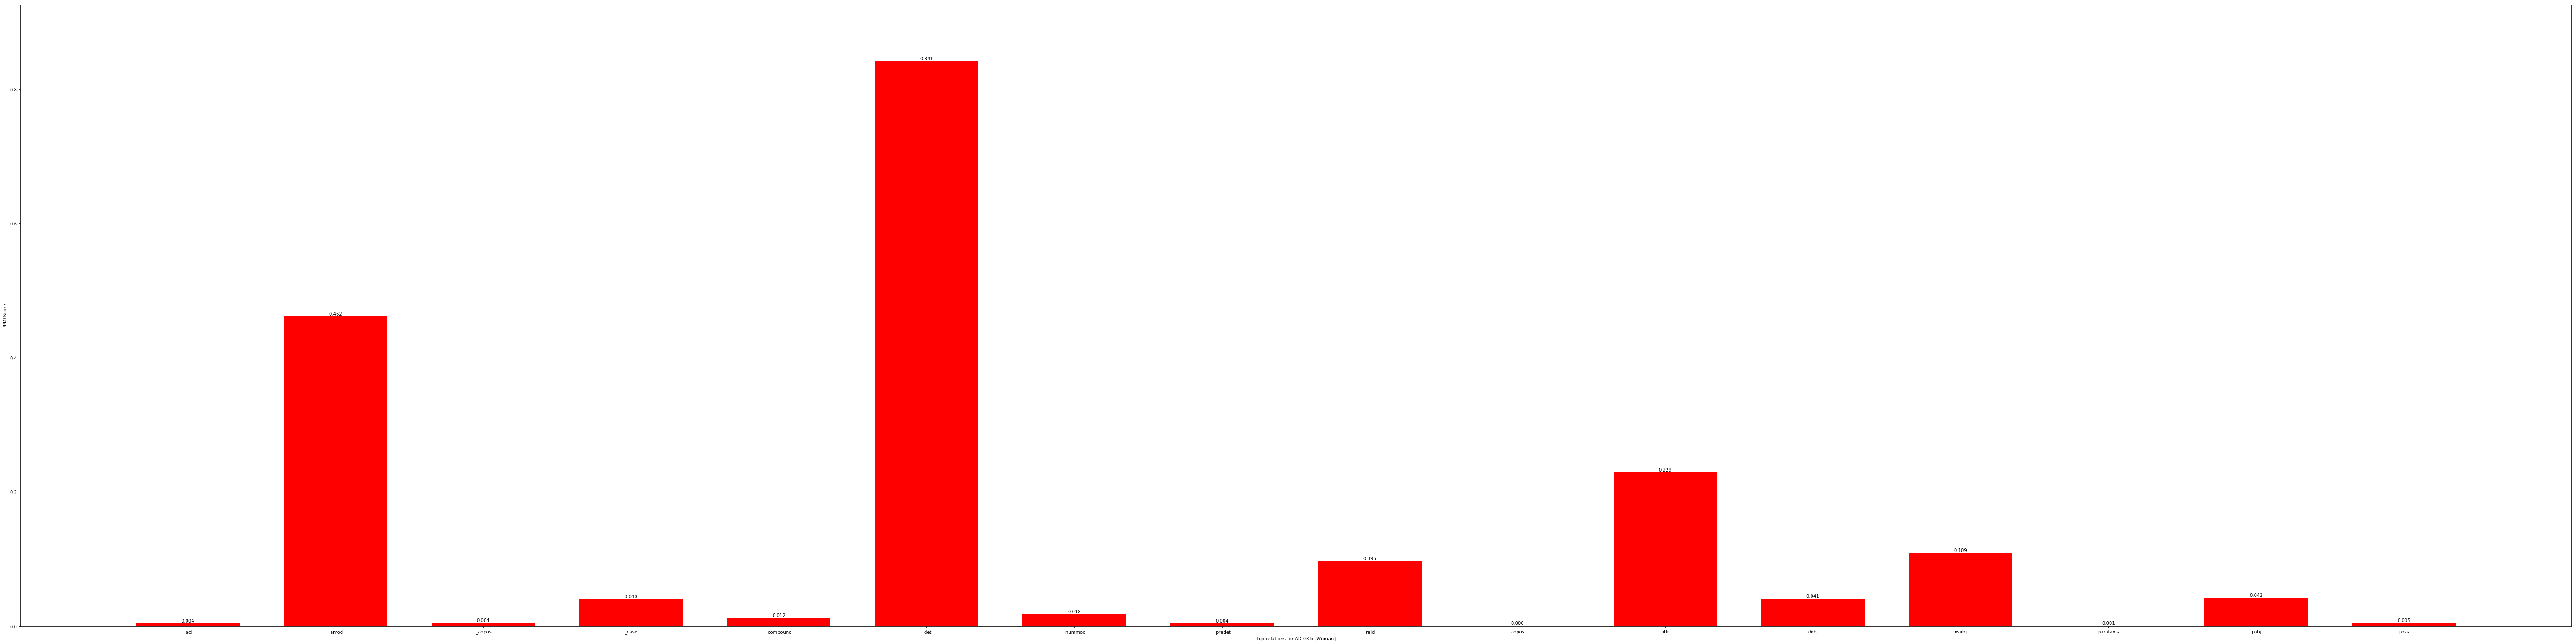

In [8]:
r=fnonl.get_top_relations('AD.03.b',displaygraph=True,cutoff=50)

(_det, 0.8739208314508907)
(attr, 0.32705074847250826)
(_amod, 0.28456589676517563)
(_relcl, 0.15965408738632994)
(nsubj, 0.1361764060056821)
(_acl, 0.03788760602477434)
(dobj, 0.03322109589751954)
(_nummod, 0.03282858576414719)
(_case, 0.02294687566560649)
(_appos, 0.009387210046738474)
(nsubjpass, 0.005568280925631214)
(appos, 0.005145071716846377)
(_predet, 0.0001068111695341552)
(dep, 4.266928737954464e-05)


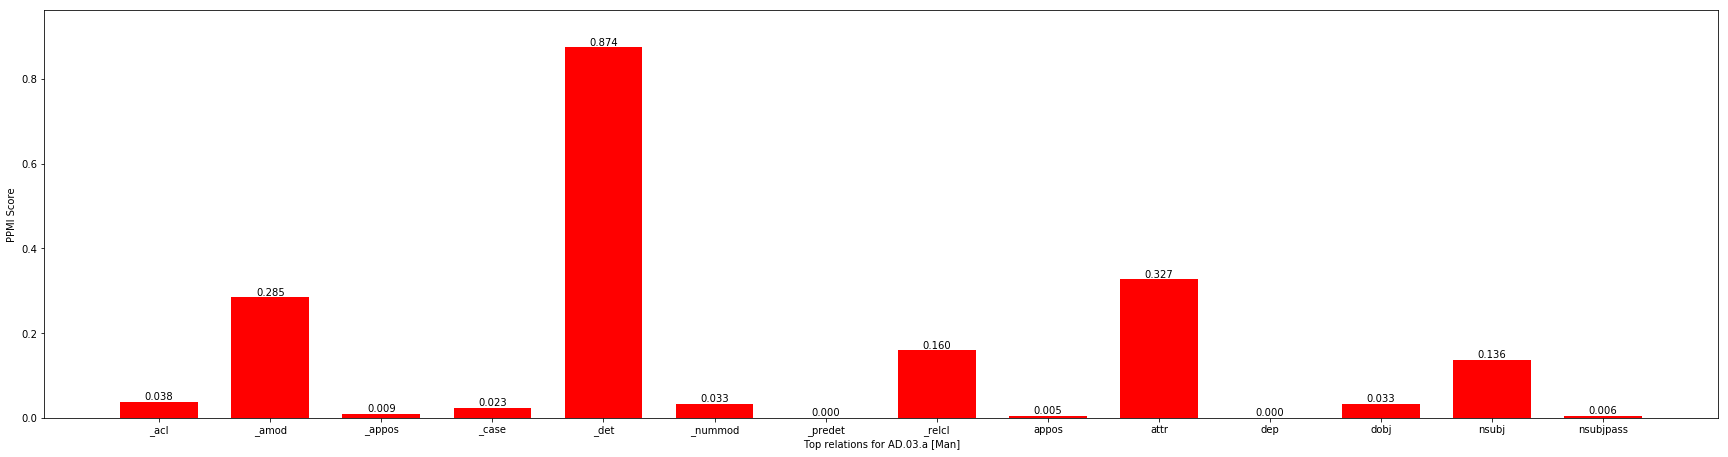

In [9]:
mr=fnonl.get_top_relations('AD.03.a',displaygraph=True,cutoff=15)

(AF.05 [Plants defined by age/cycles],0.722581893979547) : [('young', 29), ('younger', 1)]
(AP.02.b [Individual character/quality],0.4546924943649831) : [('single', 19), ('several', 2)]
(AW.04 [Poverty],0.4475576426714771) : [('poor', 13)]
(AP.07.e.05 [Fact/action of being joined/joining],0.17018787245321604) : [('married', 5)]
(AO.19.a [Calamity/misfortune],0.13742477379007914) : [('unfortunate', 5)]
(BD.04.e.02 [Innocence],0.08509393622660802) : [('innocent', 4)]
(AM.08.c.03 [Oldness/ancientness],0.061110863562303615) : [('old', 9)]
(BD.04.e.01.a [Modesty/decency],0.04254696811330401) : [('decent', 1)]
(AR.18.b [Prudence, discretion],0.04254696811330401) : [('prudent', 1)]
(AS.14.c [Disapproval, censure],0.04254696811330401) : [('shocking', 1)]


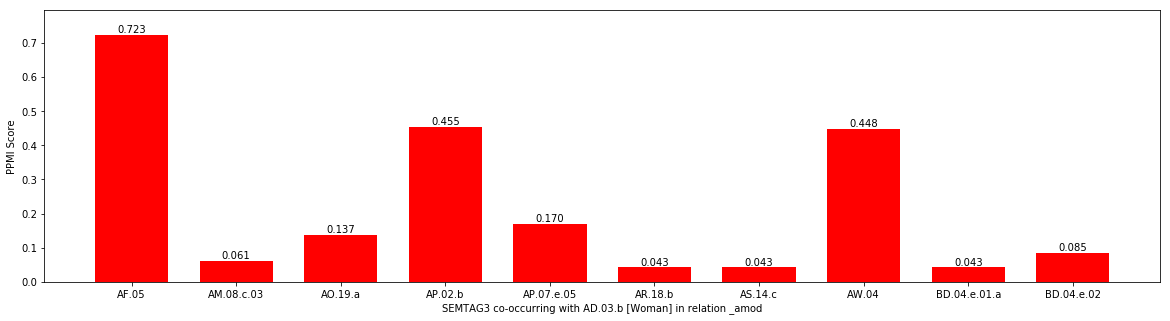

In [11]:
w=fnonl.get_top_features('AD.03.b',rel='_amod',displaygraph=True)

(AF.05 [Plants defined by age/cycles],0.9781002022727235) : [('young', 57), ('younger', 1)]
(AP.01.f [Difference],0.083073556012818) : [('other', 28), ('different', 3), ('far', 1)]
(AB.03 [Age],0.08139168687251119) : [('elderly', 5)]
(BD.04.d [Probity/honesty/uprightness],0.07951593094374106) : [('respectable', 2), ('honest', 2)]
(AG.01.ak.02.a [Excess in drinking],0.062343916290194326) : [('drunken', 4), ('intoxicated', 3), ('drinking', 2), ('tipsy', 1), ('drunk', 1), ('drink', 1)]
(BI.09 [Worker],0.062343916290194326) : [('working', 2), ('day-labouring', 2), ('workmen', 1)]
(AP.01.d [Identity],0.05852108489302418) : [('same', 23), ('duplicate', 2), ('duplicates', 1)]
(AB.17.c [Bodily height],0.053025247433899414) : [('tall', 4)]
(AP.06.c.01 [Addition/supplementation],0.053025247433899414) : [('other', 3), ('likewise', 3), ('more', 2)]
(AJ.09.e.02 [Black/blackness],0.03723894131457668) : [('black', 6)]


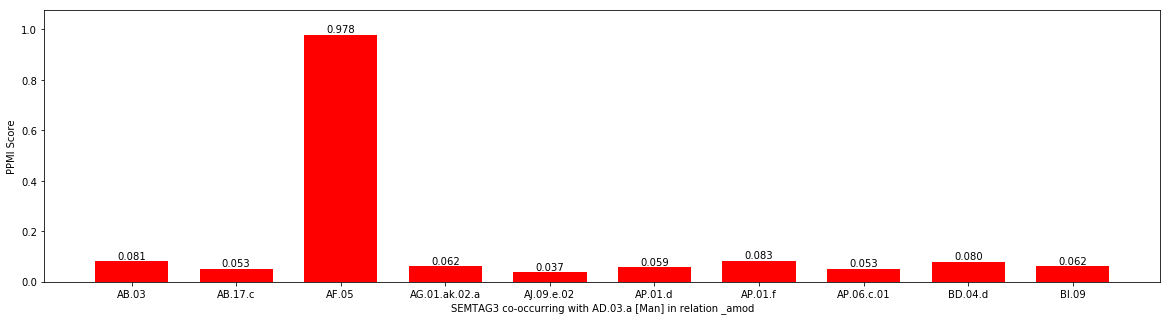

In [12]:
m=fnonl.get_top_features('AD.03.a',rel='_amod',displaygraph=True)

(AD.03.d [Child],0.8247355354361358) : [('child', 95), ('children', 55), ('small', 7)]
(AY.01.e.02 [Child],0.4948413212616815) : [('fatherless', 3), ('children', 2), ('child', 1)]
(AM.08.c.03 [Oldness/ancientness],0.25322544067061264) : [('old', 8)]
(AF.05 [Plants defined by age/cycles],0.08831920341117282) : [('youngest', 2), ('young', 2), ('younger', 1)]
(AL.02.d.02 [Smallness],0.052299435335129804) : [('small', 3), ('little', 1)]
(AS.11.a [Unimportance, triviality],0.01687385345676106) : [('little', 2)]


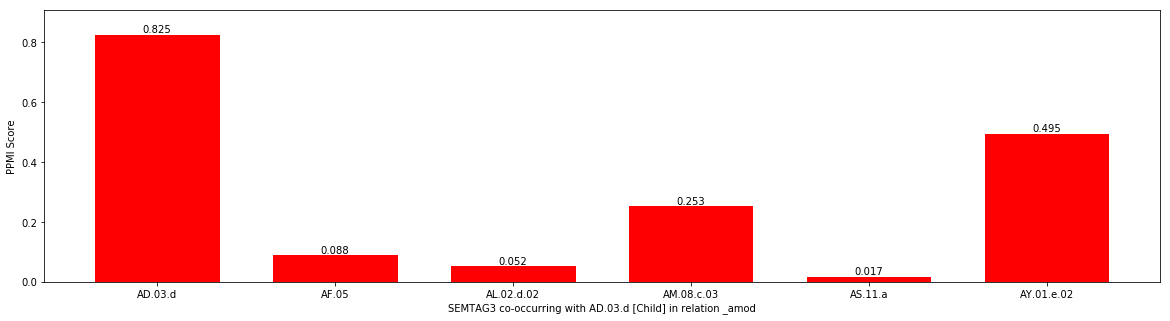

In [13]:
c=fnonl.get_top_features('AD.03.d',rel='_amod',cutoff=10,displaygraph=True)

In [14]:
fnonl.find_text('AD.03.d')

[('child', 132), ('children', 64), ('small', 10)]

find_specific_text can be used to find the specific lexemes labelled with the first argument when found co-occurring with the second argument in the relation specified in the third argument.  In other words, what words are used to express concept 1 (AB.03) when it has the relation r ('\_amod') with concept 2 (AD.03.a) 

In [21]:
fnonl.find_specific_text('AB.03','AD.03.a','_amod')

[('elderly', 5)]

In [15]:
fnonl.find_specific_text('AD.03.d','AD.03.d','_amod')

[('child', 95), ('children', 55), ('small', 7)]

TODO:: This function is returning all words which are tagged as AD.03.d (not just ones in the context of modifying AD.03.d).  This needs fixing.  However, this particular example has come up because in the phrase "small child" (which occurs 7 times), both words are tagged as AD.03.d by the Samuels Tagger.

## Comparing Corpora
We need a Samuels Comparator which takes a dictionary of filenames (as set up above) and allows us to compare one against the rest

In [16]:
test={'fnonl':'f_nonl','mnonl':'m_nonl'}

my_comp=Sam.Comparator(filenames)

Now we can compute the characteristic terms of one corpus compared to the others.  The key for the corpus which is to be compared against the others needs to be given.  

measure: default = 'llr'; others include 'pmi', 'kl' and 'jsd'

field: default = 'SEMTAG3'; any other field in the dataframe can be given e.g., 'SEMTAG1' or 'vard' but not extensively tested

cutoff: all distinctive tags will be returned for LLR, but this is used to cutoff the number for other measures and also in the list that is displayed automatically and is used in the graph

displaygraph: True to display a barchart of the terms 

Size of corpus is 219407
Size of corpus is 1302410
118 significantly characterising terms
Number of characteristic tags is 118
(AY.01.g.02 [Married man], 1331.5348625452032) : [('husband', 518), ('husbands', 5)]
(AZ.06.f.02.f [Room], 298.0152017216491) : [('room', 616), ('cellar', 23), ('garret', 10), ('rooms', 7), ('bedroom', 6), ('scullery', 4), ('closet', 4), ('back-parlour', 4), ('sitting-room', 3), ('loft', 3)]
(BF.25.j [Vestments], 269.97472034528187) : [('gown', 165), ('apron', 98), ('gowns', 57), ('aprons', 11), ('shovels', 3), ('shovel', 1)]
(AK.01 [Existence], 239.48993713865343) : [('things', 513), ('thing', 176), ('came', 176), ('in', 140), ('up', 56), ('come', 20), ('unborn', 2), ('ware', 1), ('is', 1), ('existence', 1)]
(AY.01.g.01 [Married woman], 230.99585901972938) : [('wife', 333), ('woman', 3), ("ma'am", 3)]
(AZ.06.f.02.h [Stairs], 226.160270676862) : [('stairs', 375), ('landing', 3), ('staircase', 2), ('stair-foot', 1), ('stair', 1), ('landing-place', 1)]
(AY.01.e.0

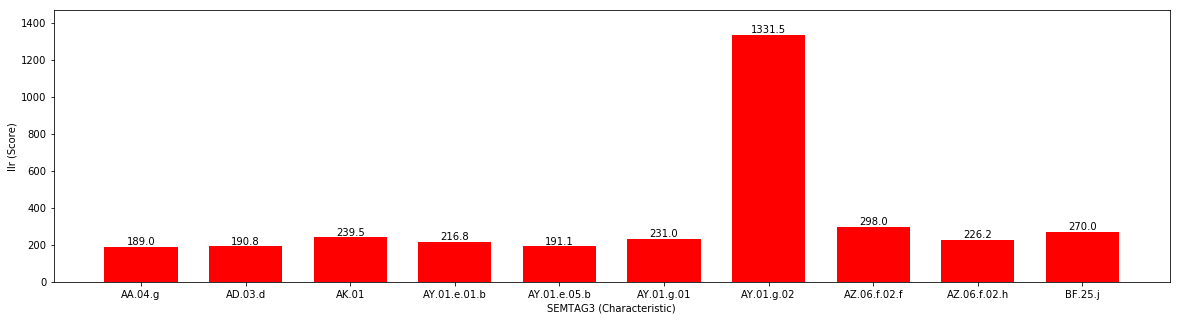

In [18]:
fdef_tags=my_comp.compute_surprises('fnonl',measure='llr',field='SEMTAG3',cutoff=10,displaygraph=True)

Size of corpus is 1083003
Size of corpus is 1302410
149 significantly characterising terms
Number of characteristic tags is 149
(BC.07.b [Law-enforcement/peace-officer], 121.22645044794501) : [('constable', 1131), ('watch-house', 312), ('watchman', 285), ('watchmen', 25), ('constables', 11), ('officer', 6)]
(BB.03 [Control], 106.7051027720248) : [('of', 110), ('charge', 109), ('took', 73), ('led', 47), ('take', 35), ('leads', 25), ('leading', 19), ('lead', 16), ('hold', 11), ('direction', 8)]
(BB.12.d.01 [Instrument/place of torture], 97.49795967762898) : [('horse', 409), ('horses', 131), ('boots', 5), ('wheels', 1), ('wheel', 1), ('picket', 1), ('gridiron', 1)]
(BA.14.k.08.a [Officer/soldier of rank], 95.35990438429283) : [('officer', 1501), ('officers', 111), ('commanding', 1)]
(AK.02 [Creation], 89.96684826455936) : [('produce', 414), ('produced', 369), ('made', 339), ('produces', 244), ('make', 114), ('producing', 62), ('making', 33), ('up', 20), ('brought', 19), ('makes', 7)]
(AO.

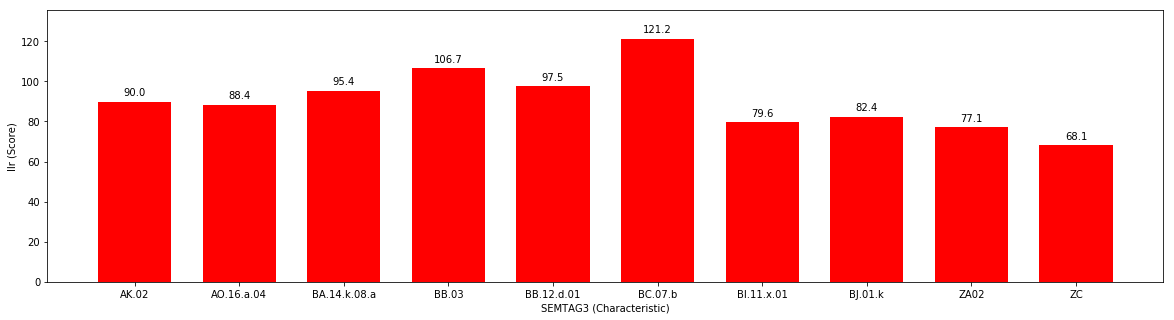

In [19]:
mwv_tags=my_comp.compute_surprises('mnonl',field='SEMTAG3',measure='llr',cutoff=10,displaygraph=True)